![alt text](logo_kepp.png)

# Ανάλυση Χρονοσειρών και Προβέψεις
### Πρακτική εφαρμογή με χρήση γλώσσας προγραμματισμού Python

### Συγγραφείς: **Γεώργιος Μακρίδης $\cdot$ Γεώργιος Φατούρος**

Τα στατιστικά μοντέλα χρονοσειρών είναι μοντέλα παλινδρόμησης (Regression) και χωρίζονται σε 3 βασικές κατηγορίες: 

1) Autoregressive models [AR(p)]:  $y_t =δ+φ_1y_{t−1}+φ^2y_{t−2}+...+φ_py_{t−p}+ε_t$

2) Moving Average models [MA(q)]: $y_t =μ+θ_1ε_{t−1}+θ^2ε_{t−2}+...+θ^qε_{t−q}+ε_t$

3) Autoregressive Moving Average models [ARMA(p,q)]: $y_t = δ + φ_1y_{t−1} +...+ φ^p y_{t−p} + θ_1ε_{t−1} +...+θ^qε
_{t−q} +ε_t$

Αυτά τα μοντέλα υποθέτουν ότι τα σφάλματα/κατάλοιπα τους (residuals, $\epsilon$) είναι ασυσχέτιστα στο χρόνο, ομοδιασκεδαστικά (έχουν σταθερή διακύμανση) και ακολουθούν κανονική κατανομή). Αν αυτές οι υποθέσεις δεν ισχύουν τότε τα παραπάνω μοντέλα δεν είναι αξιόπιστα για προβλέψεις. Όταν μία χρονοσειρά έχει αυτά τα χαρακτηριστικά λέμε ότι είναι στάσιμη και επομένως μπορούν να προβλεφθούν μελλοντικές τιμές της με σχετική ακρίβεια. 


Τυπικό παράδειγμα χρονοσειρών για στατιστική ανάλυση αποτελούν τα χρηματοοικονομικά δεδομένα. Σε αυτό το παράδειγμα τα στοιχεία αποτελούνται από τα τριμηνιαία κέρδη ανά μετοχή της Johnson & Johnson από το 1960:1 έως το 1980:4, δηλαδή 84 τρίμηνα.

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

df = pd.read_csv('jj.csv', index_col='date', parse_dates=['date'])
df.columns = ['eps']
df

,eps
date,
1960-01-01,0.71
1960-04-01,0.63
1960-07-02,0.85
1960-10-01,0.44
1961-01-01,0.61
...,...
1979-10-01,9.99
1980-01-01,16.20
1980-04-01,14.67


### Oπτικοποίηση δεδομένων

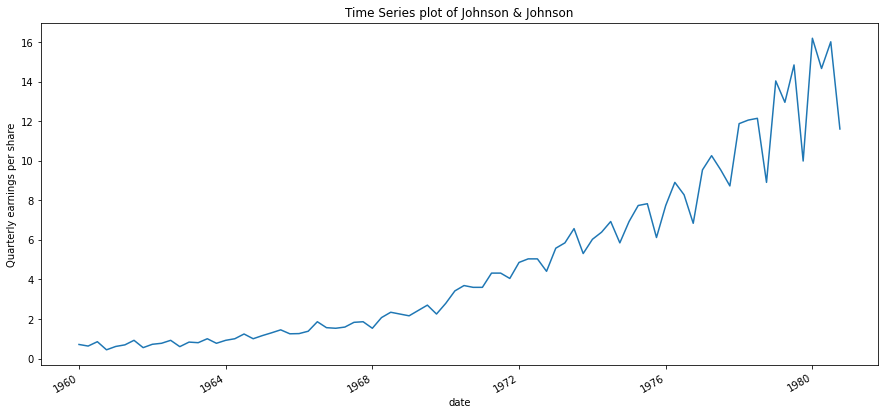

In [2]:
import matplotlib.pyplot as plt
 
df['eps'].plot(figsize=(15,7))
plt.title('Time Series plot of Johnson & Johnson')
plt.ylabel("Quarterly earnings per share")
plt.show()

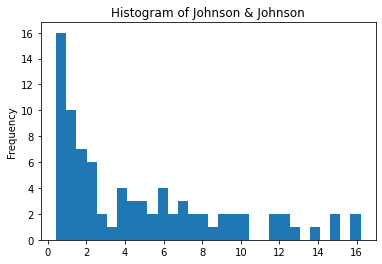

In [3]:
df['eps'].plot(kind='hist', bins=30)
plt.title('Histogram of Johnson & Johnson')
plt.show()

### Έλεγχος υποθέσεων

Από το σχήμα φαίνεται ότι η σειρά δεν είναι στάσιμη καθώς η μέση τιμή της μεταβάλλεται και υπάρχει ανοδική τάση και εποχικότητα, ενώ οι παρατηρήσεις δεν ακολουθούν την κανονική κατανομή. Ωστόσο θα κάνουμε τους απαραίτητους ελέγχους για εκπαιδευτικούς σκοπούς.

#### Έλεγχος αυτοσυσχέτισης

Έλεγχος αυτοσυσχέτισης γίνετε με το ACF διάγραμμα το οποίο δείχνει την συσχέτιση της τιμής $P$ την χρονική στιγμή $t$ σε σχέση με προηγούμενες τιμές της. Εμπειρικά αυτή η συσχέτιση πρέπει να είναι μικρότερη του 10%. Ωστόσο όπως φαίνεται στο παρακάτω σχήμα αυτή η τιμή είναι πολύ υψηλή (<30%) για αρκετά lags (=20). Η αυτοσυσχέτιση αντιμετωπίζεται με μοντέλα κινητού μέσου (ΜΑ).



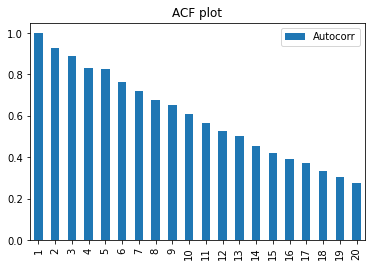

In [4]:
import pandas as pd
from statsmodels.tsa.stattools import acf, pacf, q_stat

acf1 =  acf(df['eps'])
corr_df = pd.DataFrame([acf1]).T
corr_df.columns = ['Autocorr']
corr_df.index += 1
corr_df.plot(kind='bar')
plt.title('ACF plot')
plt.show()

Έλεγχος αυτοσυσχέτισης ($ρ$) γίνετε και μέσω του  Ljung-Box test statistic (LB) με  

$H0:ρ_1 =ρ_2 =...=ρ_m = 0$, για συγκεκριμένο m

$H1:ρ_i != 0$, για τουλάχιστον ένα i ≤ m

Απορρίπτεται η H0, σε επίπεδο σημαντικότητας α, αν $LB > χ^2_{m,1−α}$

Στο παρακάτω αποτέλεσμα βλέπουμε ότι η P-Value to LB test είναι σχεδόν 0. Οπότε απορρίπτεται η Η0 και έχουμε αυτοσυσχέτηση.  

In [5]:
from statsmodels.stats.diagnostic import acorr_ljungbox
acorr_ljungbox(df['eps'], lags=3)

,lb_stat,lb_pvalue
1,74.486740,6.104694e-18
2,143.996707,5.389051e-32
3,205.858742,2.286448e-44


#### 'Έλεγχος μερικής αυτοσυσχέτησης

Έλεγχος  μερικής αυτοσυσχέτησης γίνετε με το PACF διάγραμμα το οποίο δείχνει αν η τιμής $P$ την χρονική στιγμή $t$ σε σχέση με προηγούμενες τιμές έχουν μερικής αυτοσυσχέτησης. Εμπειρικά αυτή η διακύμανση πρέπει να είναι μικρότερη του 10%. Ωστόσο όπως φαίνεται στο παρακάτω σχήμα αυτή η τιμή είναι πολύ υψηλή μεταξύ της προηγούμενης ημερών. Η αυτοσυσχέτιση αντιμετωπίζεται με αυτο-παλινδρομικά μοντέλα (ΑR).


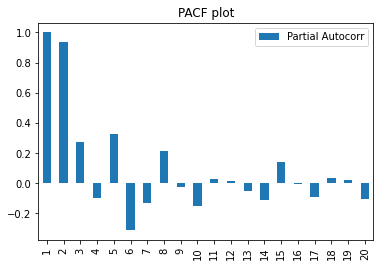

In [6]:
pacf1 =  pacf(df['eps'])
corr_df = pd.DataFrame([pacf1]).T
corr_df.columns = ['Partial Autocorr']
corr_df.index += 1
corr_df.plot(kind='bar')
plt.title('PACF plot')
plt.show()

#### Έλεγχος στασιμότητας με Unit root test

Augmented Dickey-Fuller Test

H0: η χρονοσειρά έχει μοναδιαία ρίζα (δηλαδή σχετίζεται με μη στάσιμα δεδομένα)
H1: οι χρονικές σειρές είναι πολύ πιθανό να στερούνται μοναδιαίας ρίζας και επομένως μπορούν να θεωρηθούν ότι συνδέονται με σταθερά δεδομένα

Μπορούμε να παρατηρήσουμε η τιμή p για την αποδοχή του μηδενός εκτιμάται ότι είναι 100 % οπότε αποδεχόμαστε την Η0. Δηλαδή η σειρά έχει μοναδιαία ρίζα και δεν είναι στάσιμη. 

In [7]:
from arch.unitroot import *

adf_ct = ADF(df['eps'], trend='ct' )
adf_ct.summary()

Test Statistic,1.361
P-value,1.000
Lags,11


### Επεξεργασία δεδομένων

Όπως είδαμε παραπάνω η κέρδη ανά μετοχή της J&J δεν αποτελούν μια στάσιμη χρονοσειρά με αποτέλεσμα τα οικονομετρικά μοντέλα να είναι αναποτελεσματικά. Ένας τρόπος για να πλησιάσουμε την στασιμότητα είναι οι μονοτονικές μετατροπές. Αυτές δεν αλλάζουν τα χαρακτηριστικά των αρχικών δεδομένων και επιτρέπουν, αφού προβλέψουμε τις τιμές την μετασχηματισμένης σειράς να επιστρέψουμε στην αρχική. 

Οι μετασχηματισμοί που εφαρμόζουμε είναι οι:
* Σχετική μεταβολή των τιμών $r_t = \frac{p_t -p_{t-1}}{p_{t-1}}$
* Λογαριθμικός μετασχηματισμός $\log{p_t}$
* Σχετική μεταβολή των λογαριθμικών τιμών $\log{r_t}$

Στην συνέχεια εφαρμόζουμε Unit root test για έλεγχος στασιμότητας στην στη σειρά $\log{r_t}$. Από το test βλέπουμε ότι η σειρά τώρα είναι στάσιμη (όπως επιβεβαιώνεται και από τα γραφήματα)και μπορούμε να προχωρήσουμε σε μοντελοποίηση της. 

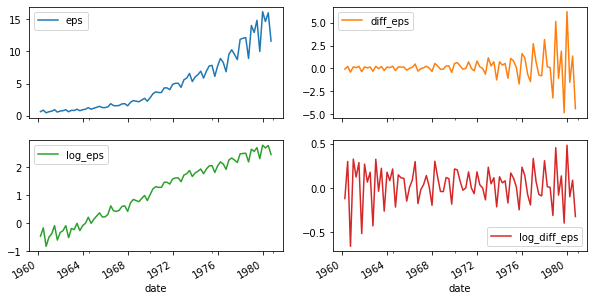

In [8]:
import numpy as np 

df['diff_eps'] = df['eps'].diff()
df['log_eps'] = np.log(df['eps'])
df['log_diff_eps']= df['log_eps'].diff()
df.dropna(inplace=True)
df.plot(figsize=(10,5),subplots=True,layout=(2,2))
plt.show()

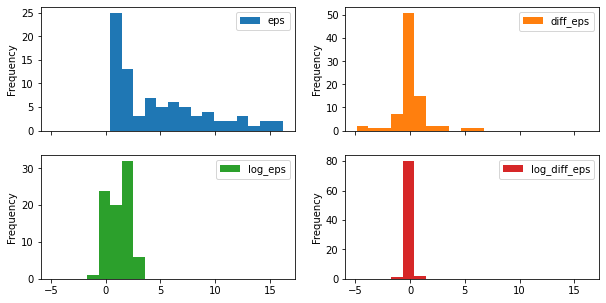

In [9]:
df.plot(figsize=(10,5),subplots=True,kind='hist', bins=20, layout=(2,2))
plt.show()


Από τα παραπάνω σχήματα μπορούμε να παρατηρήσουμε ότι η χρονοσειρά $\log{r_t}$ έχει σταθερή μέση τιμή καθώς κινείτε γύρω από το μηδέν και είναι κοντά στην κανονικότητα. Επίσης, σύμφωνα με το παρακάτω unit root test είναι στάσιμη, ενώ υπάρχει αυτοσυσχέτηση μεταξύ 7 τριμήνων, άρα ενδείκνυται χρήση μοντέλου MA(7).

In [10]:
from arch.unitroot import *

adf_ct = ADF(df['log_diff_eps'], trend='c' )
adf_ct.summary()

Test Statistic,-4.317
P-value,0.000
Lags,5


Τα διαγράμματα αυτοσυσχέτισης και μερικής αυτοσυσχέτισης είναι χρήσιμα για να εξεταστεί εάν υπάρχει εξάρτηση μεταξύ των τιμών με καθυστέρηση της αναλυόμενης σειράς. Η εντολή acf( ) και η εντολή pacf( ) δημιουργούν μια γραφική παράσταση αυτοσυσχέτισης και μερικής αυτοσυσχέτισης, αντίστοιχα. Παρακάτω, παρουσιάζονται οι γραφικές παραστάσεις αυτοσυσχέτισης και μερικής αυτοσυσχέτισης των πρώτων διαφορών των λογαριθμικών δεδομένων J&J.

Σημειώστε ότι οι τιμές υστέρησης στον άξονα Χ είναι 1, 2, 3, 4, 5,... και αντιστοιχούν στις καθυστερήσεις 4, 8, 12, 16, 20,... επειδή έχουμε τριμηνιαία δεδομένα, δηλαδή η συχνότητα είναι 4. Άρα, όπως φαίνεται στο ACF υπάρχει σημαντική συσχέτιση ανά 4 παρατηρήσεις ή 1 χρόνο (δηλ. εποχικότητα) στα κέρδη της μετοχής J&J. Σε αυτή την περίπτωση θα μπορούσαμε να συμπεριλάβουμε τον αριθμό του τριμήνου στο μοντέλο μας ως επεξηγηματική μεταβλητή.


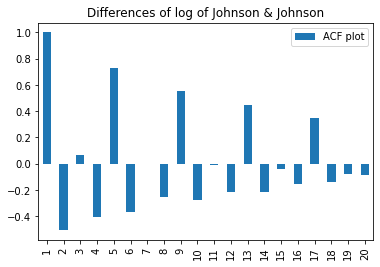

In [11]:
acf1 =  acf(df['log_diff_eps'])
corr_df = pd.DataFrame([acf1]).T
corr_df.columns = ['ACF plot']
corr_df.index += 1
corr_df.plot(kind='bar')
plt.title('Differences of log of Johnson & Johnson')
plt.show()

Το παρακάτω PACF υποδεικνύει ότι πρέπει να χρησιμοποιήσουμε μοντέλο AR(5) για την αντιμετώπιση της μερικής αυτοσυσχέτισης.

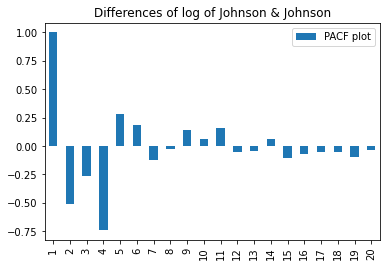

In [12]:
pacf1 =  pacf(df['log_diff_eps'])
corr_df = pd.DataFrame([pacf1]).T
corr_df.columns = ['PACF plot']
corr_df.index += 1
corr_df.plot(kind='bar')
plt.title('Differences of log of Johnson & Johnson')
plt.show()

### Μοντελοποίηση χρονοσειράς $\log r_{jj}$

Για να δημιουργήσουμε το μοντέλα χρονοσειρών θα χρησιμοποιήσουμε το πακέτο `ARIMA` από την βιβλιοθήκη `statsmodels`. Αυτό το πακέτο συνθέτει ένα αυτοπαλινδρομικό μοντέλο, AR(𝑝), ένα μοντέλο ολοκλήρωσης, I(𝑑), και ένα μοντέλο κινούμενου μέσου όρου, MA(𝑞), βάσει των τιμών (p,d,q) δημιουργείται και το αντίστοιχο μοντέλο. 
  
#### Moving Average model [MA(q)]

Εδώ θα φτιάξουμε ένα ΜΑ(q=3) μοντέλο το θα χρησιμοποιεί τους μέσους όρους των 3 τελευταίων 3μήνων για να προβλέψει το επόμενο. Οι παράμετροι του μοντέλου φαίνονται στην στήλη `coef` του παρακάτω πίνακα.

In [13]:
from statsmodels.tsa.arima.model import ARIMA
MA = ARIMA(endog=df['log_diff_eps'].values, order=(0, 0, 3))
MA_results = MA.fit()
print(MA_results.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   83
Model:                 ARIMA(0, 0, 3)   Log Likelihood                  45.577
Date:                Sun, 11 Sep 2022   AIC                            -81.155
Time:                        02:06:12   BIC                            -69.061
Sample:                             0   HQIC                           -76.296
                                 - 83                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0378      0.005      7.288      0.000       0.028       0.048
ma.L1         -1.2177      0.114    -10.646      0.000      -1.442      -0.994
ma.L2          0.2814      0.164      1.717      0.0

#### Autoregressive model [AR(p)]

Εδώ θα φτιάξουμε ένα AR(q=5) μοντέλο το θα χρησιμοποιεί τα 5 τελευταία 3μήνα για να προβλέψει το επόμενο. Οι παράμετροι του μοντέλου φαίνονται στην στήλη `coef` του παρακάτω πίνακα. Από αυτά βλέπουμε ότι τα κέρδη της μετοχής τα προηγούμενα 3 τρίμηνα επιδρούν αρνητικά ενώ το περσινό θετικά. 

In [14]:

ARMA = ARIMA(endog=df['log_diff_eps'].values, order=(5, 0, 0))
AR_results = ARMA.fit()
print(AR_results.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   83
Model:                 ARIMA(5, 0, 0)   Log Likelihood                  81.398
Date:                Sun, 11 Sep 2022   AIC                           -148.795
Time:                        02:06:12   BIC                           -131.863
Sample:                             0   HQIC                          -141.993
                                 - 83                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0381      0.005      8.401      0.000       0.029       0.047
ar.L1         -0.7235      0.113     -6.382      0.000      -0.946      -0.501
ar.L2         -0.5189      0.140     -3.700      0.0

/Users/giorgosfat17/anaconda3/envs/PredictVaR/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


#### ARMA(p,q) model

Εδώ συνδυάζουμε τα μοντέλα AR και MA σε ένα ARMA(2,2). Η επιλογή των παραμέτρων p,q έγινε μετά από δοκιμές και εξετάζοντας τα αποτελέσματα των μοντέλων.

In [15]:
ARMA = ARIMA(endog=df['log_diff_eps'].values, order=(2, 0, 2))
ARMA_results = ARMA.fit()
print(ARMA_results.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   83
Model:                 ARIMA(2, 0, 2)   Log Likelihood                  45.226
Date:                Sun, 11 Sep 2022   AIC                            -78.453
Time:                        02:06:13   BIC                            -63.940
Sample:                             0   HQIC                           -72.622
                                 - 83                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0394      0.004     10.474      0.000       0.032       0.047
ar.L1         -0.8814      0.205     -4.294      0.000      -1.284      -0.479
ar.L2          0.1096      0.202      0.543      0.5

/Users/giorgosfat17/anaconda3/envs/PredictVaR/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Η επιλογή του καλύτερου μοντέλου γίνεται με βάσει το report που μας δίνει η βιβλιοθήκη `statsmodels`. Συγκεκριμένα, στόχος είναι να πετύχουμε υψηλό Log Likelihood, χαμηλά AIC και BIC scores, Jarque-Bera, Heteroskedasticity και Ljung-Box κοντά στο μηδέν (= κανονικότητα) και Kurtosis<3. Σύμφωνα με αυτά, το καλύτερο μοντέλο είναι το AR(5)

### Προβλέψεις

Χρησιμοποιώντας το ARR(5) μοντέλο θα προβλέψουμε τσ κέρδη αν μετοχή για τον τελευταίο χρόνο (4 τρίμηνα). 

Βήματα:


1) Επανεκπαίδευση του μοντέλου χρησιμοποιώντας όλα τα δεδομένα (λογαριθμικές διαφορές κερδών μετοχής) εκτός από τις 4 τελευταίες εγγραφές που θέλουμε να προβλέψουμε.

2) Πρόβλεψη των λογαριθμικών διαφορών κερδών μετοχής για τα τελευταία 4 τρίμηνα.

3) Οπτικοποίηση πραγματικών και εκτιμώμενων λογαριθμικών διαφορών κερδών μετοχής για τα τελευταία 4 τρίμηνα

5) Μετατροπή των εκτιμώμενων λογαριθμικών διαφορών κερδών μετοχής σε λογαριθμικών κερδών μετοχής και τελικά σε εκτιμώμενων κερδών μετοχής.

6) Τελική οπτικοποίηση πραγματικών και εκτιμώμενων κερδών μετοχής.



In [16]:
ARMA = ARIMA(endog=df['log_diff_eps'].values[:-4], order=(5, 0, 0))
AR_results = ARMA.fit()
# 4-step out-of sample forecast
forecast = AR_results.forecast(4)
# add -5th value to calcute eps_pred from log_diff_eps_pred
forecast = np.append(df['log_diff_eps'].values[-5],forecast)

/Users/giorgosfat17/anaconda3/envs/PredictVaR/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [17]:
results  = df.tail(5)
results['log_diff_eps_pred'] = forecast
results

,eps,diff_eps,log_eps,log_diff_eps,log_diff_eps_pred
date,,,,,
1979-10-01,9.99,-4.86,2.301585,-0.396415,-0.396415
1980-01-01,16.20,6.21,2.785011,0.483427,0.471251
1980-04-01,14.67,-1.53,2.685805,-0.099207,-0.083827
1980-07-02,16.02,1.35,2.773838,0.088033,0.156952
1980-10-01,11.61,-4.41,2.451867,-0.321971,-0.367277


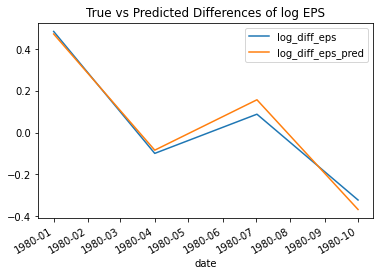

In [18]:
results[['log_diff_eps', 'log_diff_eps_pred']][-4:].plot()
plt.title('True vs Predicted Differences of log EPS')
plt.show()

In [19]:
# calculate log_eps_pred from log_diff_eps_pred
results['eps_log_pred'] = results['log_eps'].shift(1) + results['log_diff_eps_pred']
results.dropna(inplace=True)
# calculate eps_pred from log_eps_pred
results['eps_pred'] = np.exp(results['eps_log_pred'])

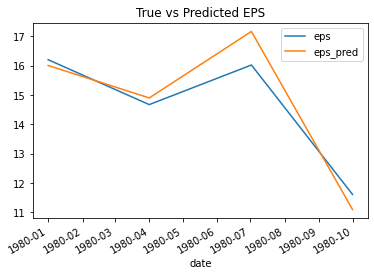

In [20]:
results[['eps', 'eps_pred']].plot()
plt.title('True vs Predicted EPS')
plt.show()